# Classifying cifar-10 images with 2D-CNN

### Read cifar-10 data

In [3]:
import numpy as np
train = np.load('cifar_train.npz')
x_train = train['data']
train_labels = train['labels']

test = np.load('cifar_test.npz')
x_test = test['data']
test_labels = test['labels']

print('train_data:', x_train.shape)
print('train_labels:', train_labels.shape)
print('test_data:', x_test.shape)
print('test_labels:', test_labels.shape)

train_data: (50000, 32, 32, 3)
train_labels: (50000, 1)
test_data: (10000, 32, 32, 3)
test_labels: (10000, 1)


### Plotting a few train images

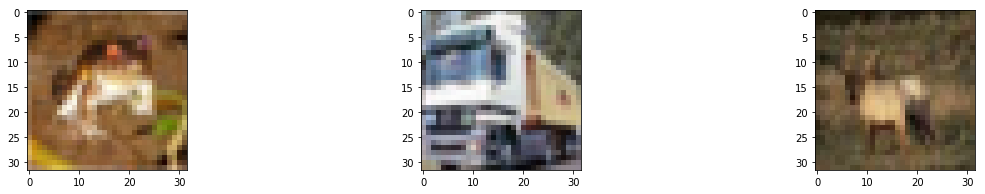

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
plt.imshow(x_train[0])
plt.subplot(3,3,2)
plt.imshow(x_train[1])
plt.subplot(3,3,3)
plt.imshow(x_train[3])

### Training a CNN for classification

In [5]:
batch_size = 32
nb_classes = 10
nb_epoch = 25

img_rows, img_cols = 32, 32    # input image dimensions
img_channels = 3               # The CIFAR10 images are RGB.

# Convert class vectors to binary class matrices.
from keras.utils import to_categorical
y_train = to_categorical(train_labels, nb_classes)
y_test = to_categorical(test_labels, nb_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [8]:
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='same', 
                        input_shape=(img_rows,img_cols,img_channels), 
                        activation='relu'))
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
model.fit(x_train[:50000], y_train[:50000],
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test[:10000], y_test[:10000]),
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 408s 8ms/step - loss: 2.3030 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/5
50000/50000 [==============================] - 414s 8ms/step - loss: 2.3028 - acc: 0.0964 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/5
50000/50000 [==============================] - 409s 8ms/step - loss: 2.3028 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/5
50000/50000 [==============================] - 396s 8ms/step - loss: 2.3028 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/5
50000/50000 [==============================] - 400s 8ms/step - loss: 2.3028 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000


In [9]:
print(batch_size)
print(nb_epoch)
model.summary()

32
25
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
____